In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  intercept = np.ones((features_X.shape[0], 1))
  features_X = np.concatenate((intercept, features_X), axis=1)
  return features_X, sales_Y

In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual

In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

In [7]:
#Question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [9]:
#Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [11]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [13]:
population = initializePopulation(100)
print(len(population))

100


In [14]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [15]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


In [16]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # Selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication

        # Crossover
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        # Mutation
        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

In [17]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [18]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)
  return losses_list


In [19]:
losses_list = run_GA()

Best loss: 2326.1764485526114 with chromsome:  [0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]
Best loss: 1443.9538838801056 with chromsome:  [-1.8032164891002678, -0.10604215149170648, 2.6521635987222725, -0.7916891144036697]
Best loss: 294.8065502386546 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]
Best loss: 294.8065502386546 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]
Best loss: 294.8065502386546 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]
Best loss: 194.75765919139513 with chromsome:  [-1.536557907978603, 0.09294055512451882, 0.18682215420964599, 0.3190190964552775]
Best loss: 109.04732560917573 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, -0.3664078533646009]
Best loss: 108.45153157529141 with chromsome:  [-4.7355836317883995, 0.1264912163847609, 0.54

Best loss: 1049.1103131651496 with chromsome:  [-1.2439864083756291, -0.2097105385284559, 1.4446199087989742, -0.010676274335411629]
Best loss: 775.0166538944146 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss: 775.0166538944146 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss: 775.0166538944146 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss: 242.16271763028462 with chromsome:  [3.5669987923445943, 0.048689906598547994, 0.569597176981278, 0.13674461207339172]
Best loss: 213.0488738125476 with chromsome:  [2.3968383580954447, 0.048689906598547994, 0.569597176981278, 0.13674461207339172]
Best loss: 174.04271872477082 with chromsome:  [3.001218866025457, 0.048689906598547994, -0.42852009616953235, 0.13674461207339172]
Best loss: 38.75166663513227 with chromsome:  [-0.16580938117906063, 0.038108

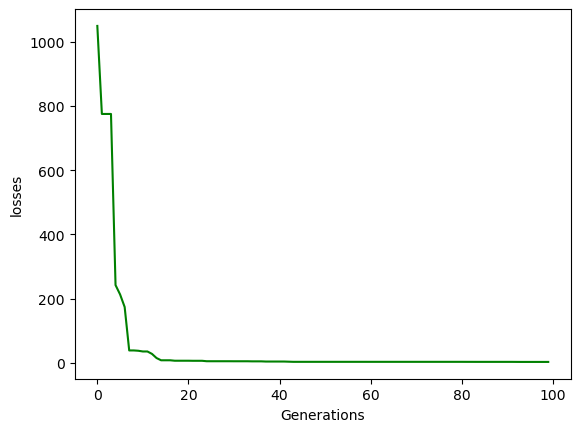

In [20]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list, c='green')
  plt.xlabel('Generations')
  plt.ylabel('losses')
  plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


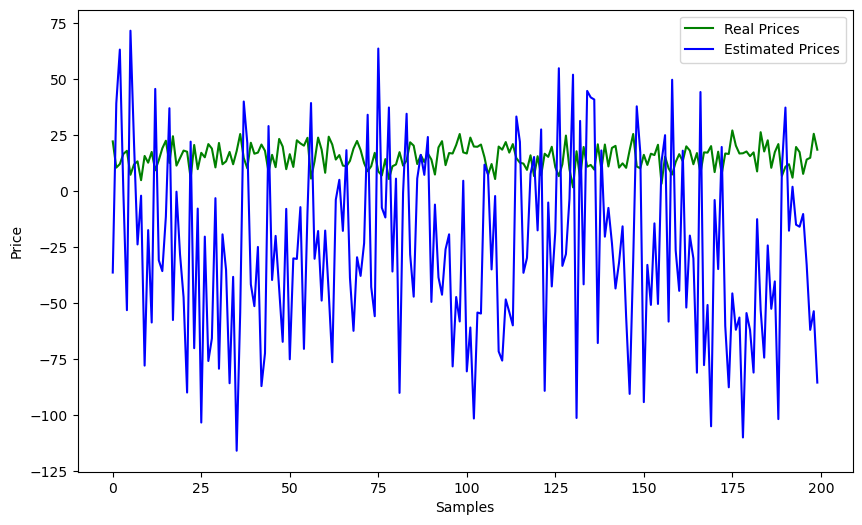

In [21]:
def visualize_predict_gt():
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


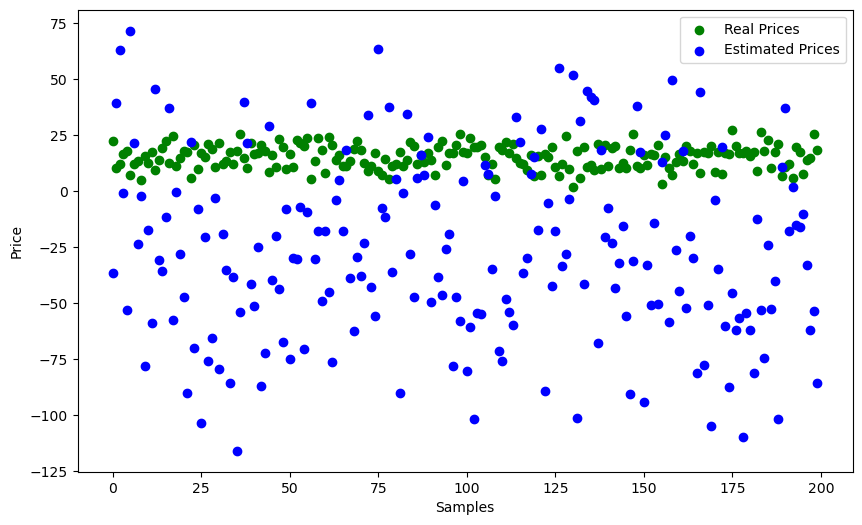

In [22]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))

plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()